In [1]:
import sys
sys.path.append('../')

In [2]:
from rumboost.utils import *
from rumboost.utility_smoothing import *
from rumboost.rumboost import *
from rumboost.dataset import *
from rumboost.models import *
from rumboost.utility_plotting import *
from rumboost.post_process import *

import lightgbm

# Example: Attribute interactions

This notebook shows features implemented in RUMBoost through an example on the LPMC dataset, a mode choice dataset in London developed Hillel et al. (2018). You can find the original source of data [here](https://www.icevirtuallibrary.com/doi/suppl/10.1680/jsmic.17.00018) and the original paper [here](https://www.icevirtuallibrary.com/doi/full/10.1680/jsmic.17.00018).

We first load the preprocessed dataset and its folds for cross-validation. You can find the data under the Data folder

In [3]:
#load dataset
LPMC_train, LPMC_test, folds = load_preprocess_LPMC()

#load model
LPMC_model = LPMC(LPMC_train)

## Attribute interactions model

We arbitrarily allow for the age and the travel time to interact. To do so, we update the ```'interaction_constraints'``` values of the model in the ```rum_structure``` dictionary. We keep the same hyperparameters from rumboost, apart from the number of boosting rounds.

### Training with 5-fold CV

In [4]:
_, _, folds = load_preprocess_LPMC()

params = {'n_jobs': -1,
          'num_classes':4,
          'objective':'multiclass',
          'boosting': 'gbdt',
          'monotone_constraints_method': 'advanced',
          'verbosity': -1,
          'num_iterations':3000,
          'early_stopping_round':100,
          'learning_rate':0.1,
          'max_depth':1
          }

#features and label column names
features = [f for f in LPMC_train.columns if f != "choice"]
label = "choice"

#create lightgbm dataset
lgb_train_set = lightgbm.Dataset(LPMC_train[features], label=LPMC_train[label], free_raw_data=False)
lgb_test_set = lightgbm.Dataset(LPMC_test[features], label=LPMC_test[label], free_raw_data=False)

ce_loss = 0
num_trees = 0

for i, (train_idx, test_idx) in enumerate(folds):
    train_set = lgb_train_set.subset(sorted(train_idx))
    test_set = lgb_train_set.subset(sorted(test_idx))

    # Create the classifier
    params['max_depth'] = 2
    param = copy.deepcopy(params)
    rum_structure = bio_to_rumboost(LPMC_model)
    rum_structure[0]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14]]
    rum_structure[1]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14]]
    rum_structure[2]['interaction_constraints'] = [[0, 17], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14], [16], [18], [19], [20], [21], [22]]
    rum_structure[3]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14], [17]]

    print('-'*50 + '\n')
    print(f'Iteration {i+1}')
    LPMC_model_trained = rum_train(param,train_set,rum_structure=rum_structure, valid_sets = [test_set])
    ce_loss += LPMC_model_trained.best_score
    num_trees += LPMC_model_trained.best_iteration
    print('-'*50 + '\n')
    print(f'Best cross entropy loss: {LPMC_model_trained.best_score}')
    print(f'Best number of trees: {LPMC_model_trained.best_iteration}')

ce_loss = ce_loss/5
num_trees = num_trees/5
print('-'*50 + '\n')
print(f'Cross validation negative cross entropy loss: {ce_loss}')
print(f'With a number of trees on average of {num_trees}')

--------------------------------------------------

Iteration 1


c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\bas

Early stopping at iteration 767, with a best score on test set of 0.6661164209958064, and on train set of 0.6420175972170987
Finished loading model, total used 868 iterations
Finished loading model, total used 868 iterations
Finished loading model, total used 868 iterations
Finished loading model, total used 868 iterations
--------------------------------------------------

Best cross entropy loss: 0.6661164209958064
Best number of trees: 767
--------------------------------------------------

Iteration 2


c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\bas

Early stopping at iteration 683, with a best score on test set of 0.6537943544223168, and on train set of 0.6462670257070037
Finished loading model, total used 784 iterations
Finished loading model, total used 784 iterations
Finished loading model, total used 784 iterations
Finished loading model, total used 784 iterations
--------------------------------------------------

Best cross entropy loss: 0.6537943544223168
Best number of trees: 683
--------------------------------------------------

Iteration 3


c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\bas

Early stopping at iteration 755, with a best score on test set of 0.665407782702733, and on train set of 0.6424541437034261
Finished loading model, total used 856 iterations
Finished loading model, total used 856 iterations
Finished loading model, total used 856 iterations
Finished loading model, total used 856 iterations
--------------------------------------------------

Best cross entropy loss: 0.665407782702733
Best number of trees: 755
--------------------------------------------------

Iteration 4


c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\bas

Early stopping at iteration 659, with a best score on test set of 0.6715070781285492, and on train set of 0.6424287371558288
Finished loading model, total used 760 iterations
Finished loading model, total used 760 iterations
Finished loading model, total used 760 iterations
Finished loading model, total used 760 iterations
--------------------------------------------------

Best cross entropy loss: 0.6715070781285492
Best number of trees: 659
--------------------------------------------------

Iteration 5


c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\bas

Early stopping at iteration 572, with a best score on test set of 0.678648991376894, and on train set of 0.6425330439072285
Finished loading model, total used 673 iterations
Finished loading model, total used 673 iterations
Finished loading model, total used 673 iterations
Finished loading model, total used 673 iterations
--------------------------------------------------

Best cross entropy loss: 0.678648991376894
Best number of trees: 572
--------------------------------------------------

Cross validation negative cross entropy loss: 0.6670949255252598
With a number of trees on average of 687.2


### Testing the model on out-of-sample data

Now that we have the optimal number of trees (687), we can train the final version of the model on the full dataset, and test it on out-of-sample data with the ```predict()``` function. Note that the dataset must be a lightgbm object in the ```predict()``` function.

In [ ]:
rum_structure = bio_to_rumboost(LPMC_model)
rum_structure[0]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14]]
rum_structure[1]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14]]
rum_structure[2]['interaction_constraints'] = [[0, 17], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14], [16], [18], [19], [20], [21], [22]]
rum_structure[3]['interaction_constraints'] = [[0, 16], [2], [5], [15], [1], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14], [17]]

params = {'n_jobs': -1,
          'num_classes':4,
          'objective':'multiclass',
          'boosting': 'gbdt',
          'monotone_constraints_method': 'advanced',
          'verbosity': -1,
          'num_iterations':687,
          #'early_stopping_round':100,
          'learning_rate':0.1,
          'max_depth':2
          }

LPMCFI_model_fully_trained = rum_train(params, lgb_train_set, rum_structure)

preds = LPMCFI_model_fully_trained.predict(lgb_test_set)

ce_test = cross_entropy(preds, lgb_test_set.get_label().astype(int))

print('-'*50)
print(f'Final negative cross-entropy on the test set: {ce_test}')

c:\Users\ucesnjs\OneDrive - University College London\Documents\PhD - UCL\rumboost\example\..\rumboost\rumboost.py:825: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Finished loading model, total used 687 iterations
Finished loading model, total used 687 iterations
Finished loading model, total used 687 iterations
Finished loading model, total used 687 iterations
--------------------------------------------------
Final negative cross-entropy on the test set: 0.6853732131802694


### Plotting feature interaction on a contour plot

c:\Users\ucesnjs\OneDrive - University College London\Documents\PhD - UCL\rumboost\example\..\rumboost\utility_plotting.py:110: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(X, Y, contour_plot.T, levels=res, linewidths=0, cmap=customPalette, vmin=-12, vmax=0)


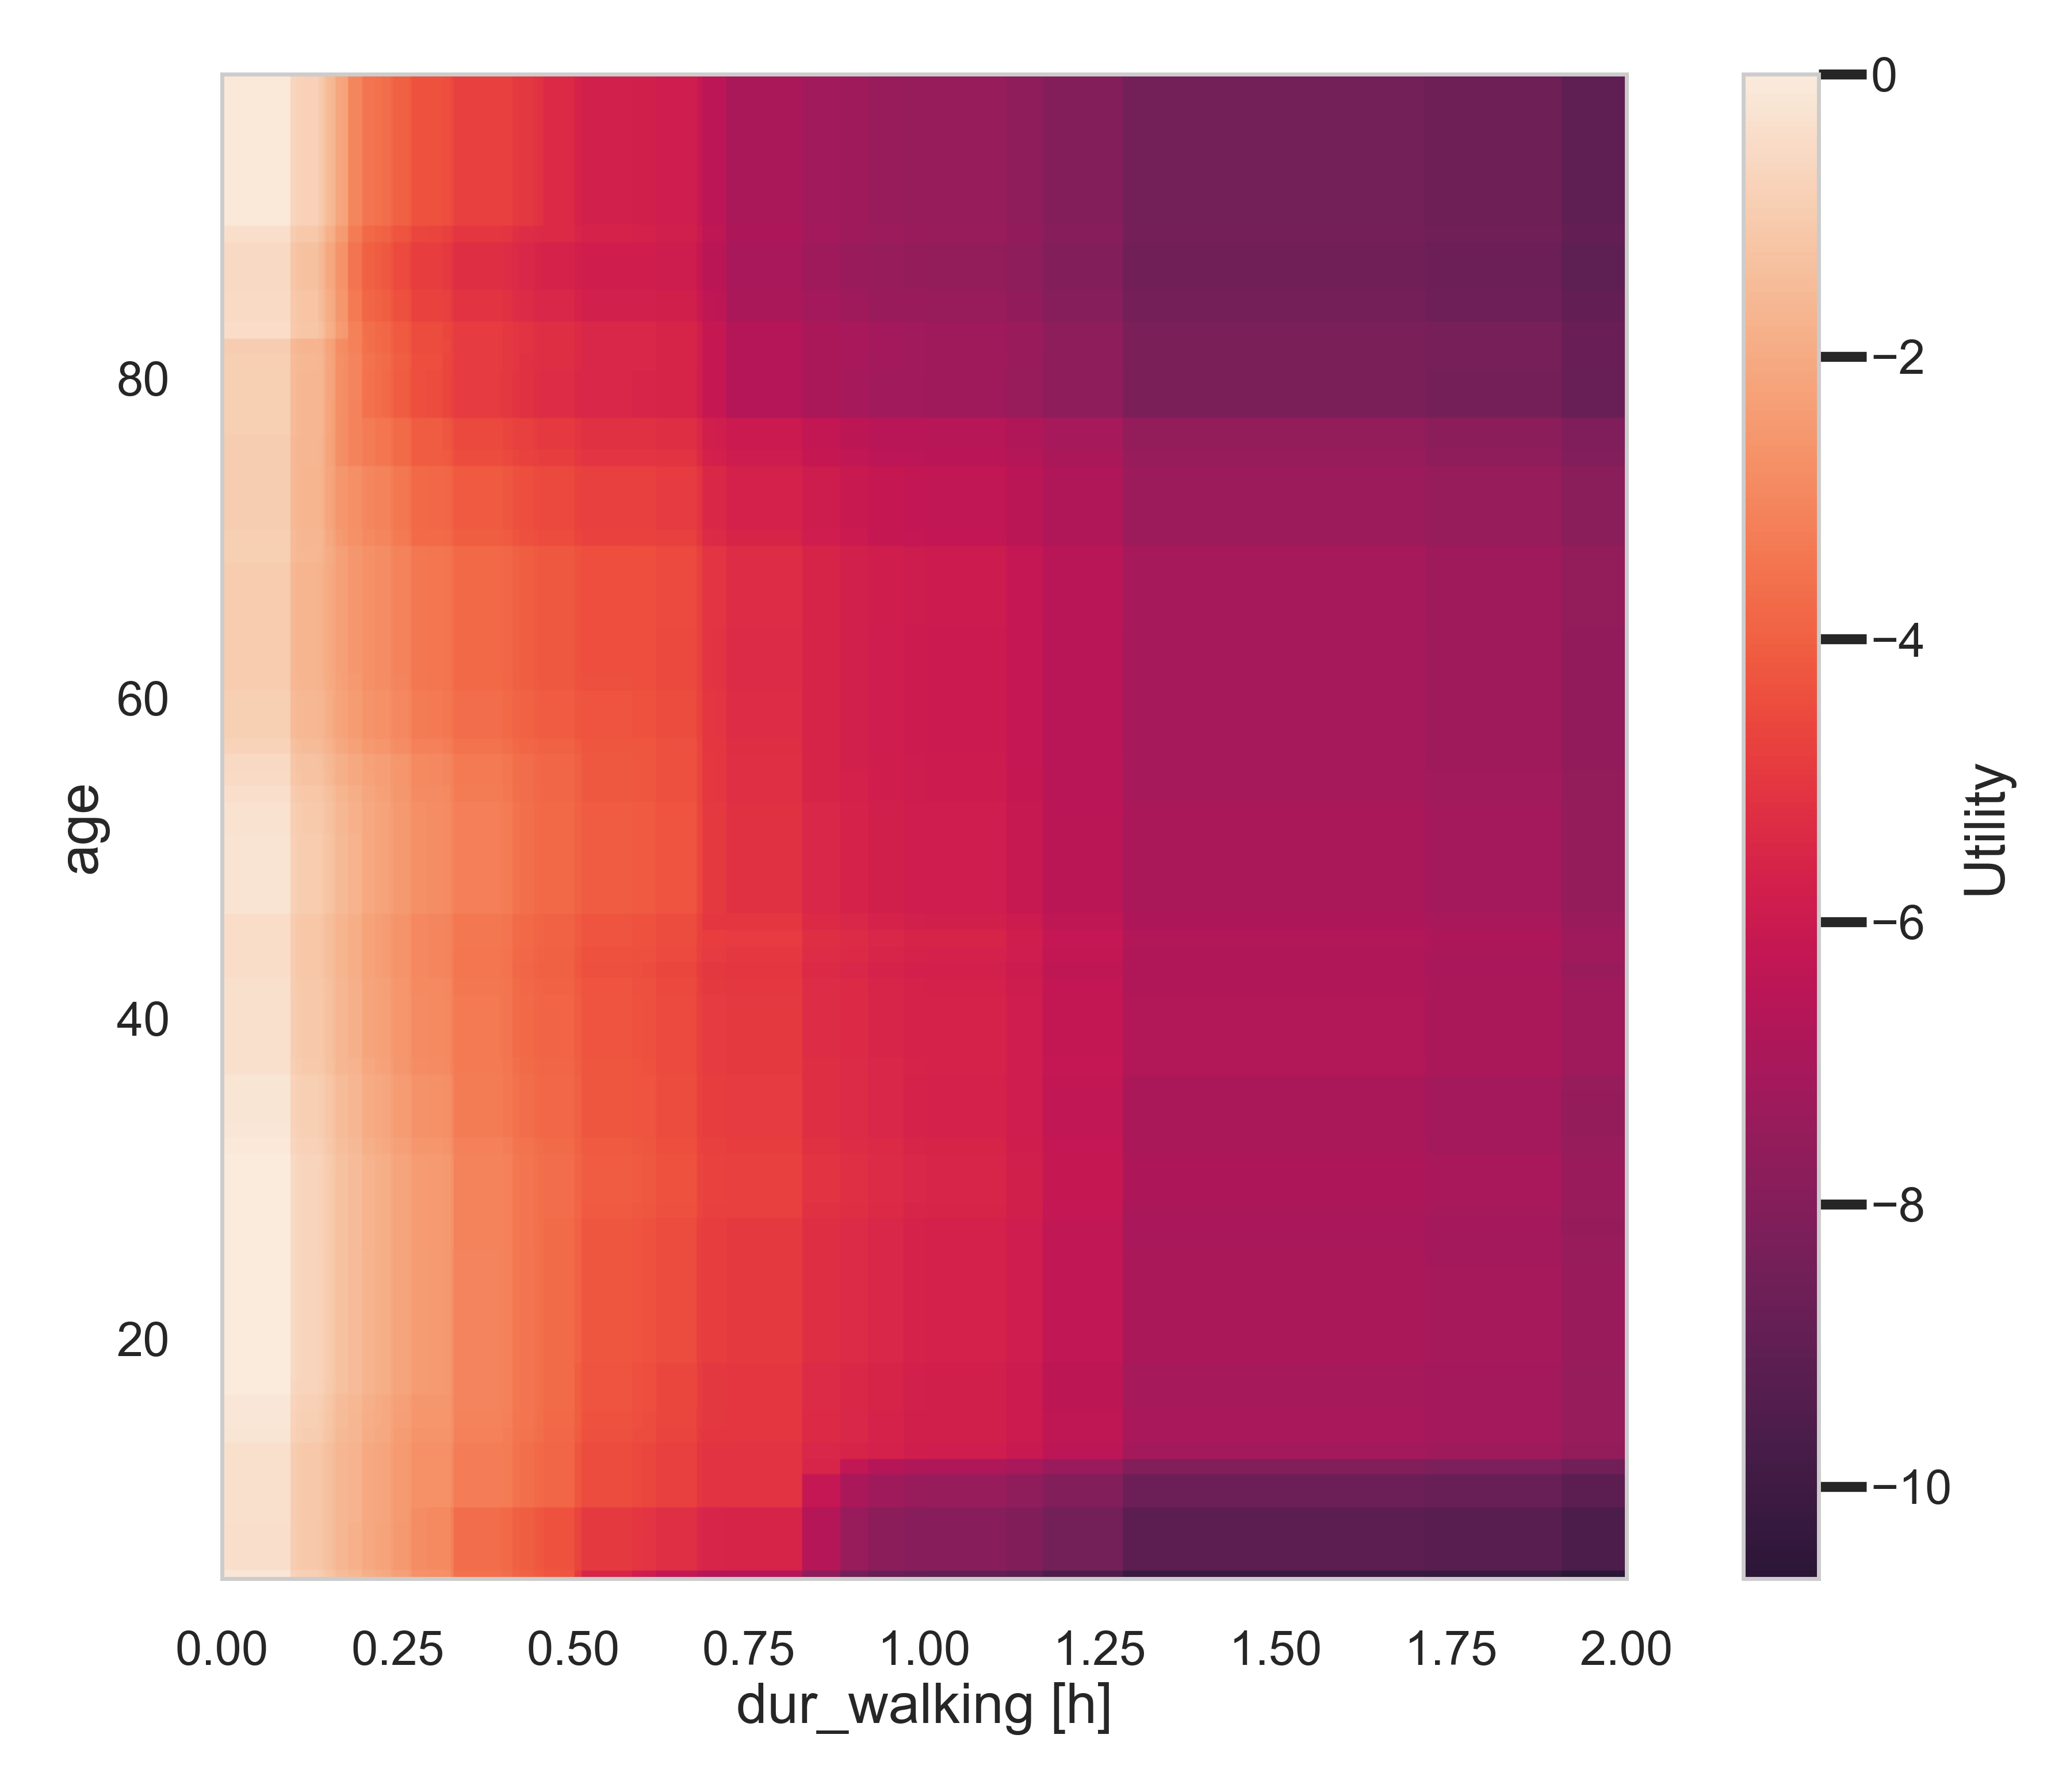

c:\Users\ucesnjs\OneDrive - University College London\Documents\PhD - UCL\rumboost\example\..\rumboost\utility_plotting.py:110: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(X, Y, contour_plot.T, levels=res, linewidths=0, cmap=customPalette, vmin=-12, vmax=0)


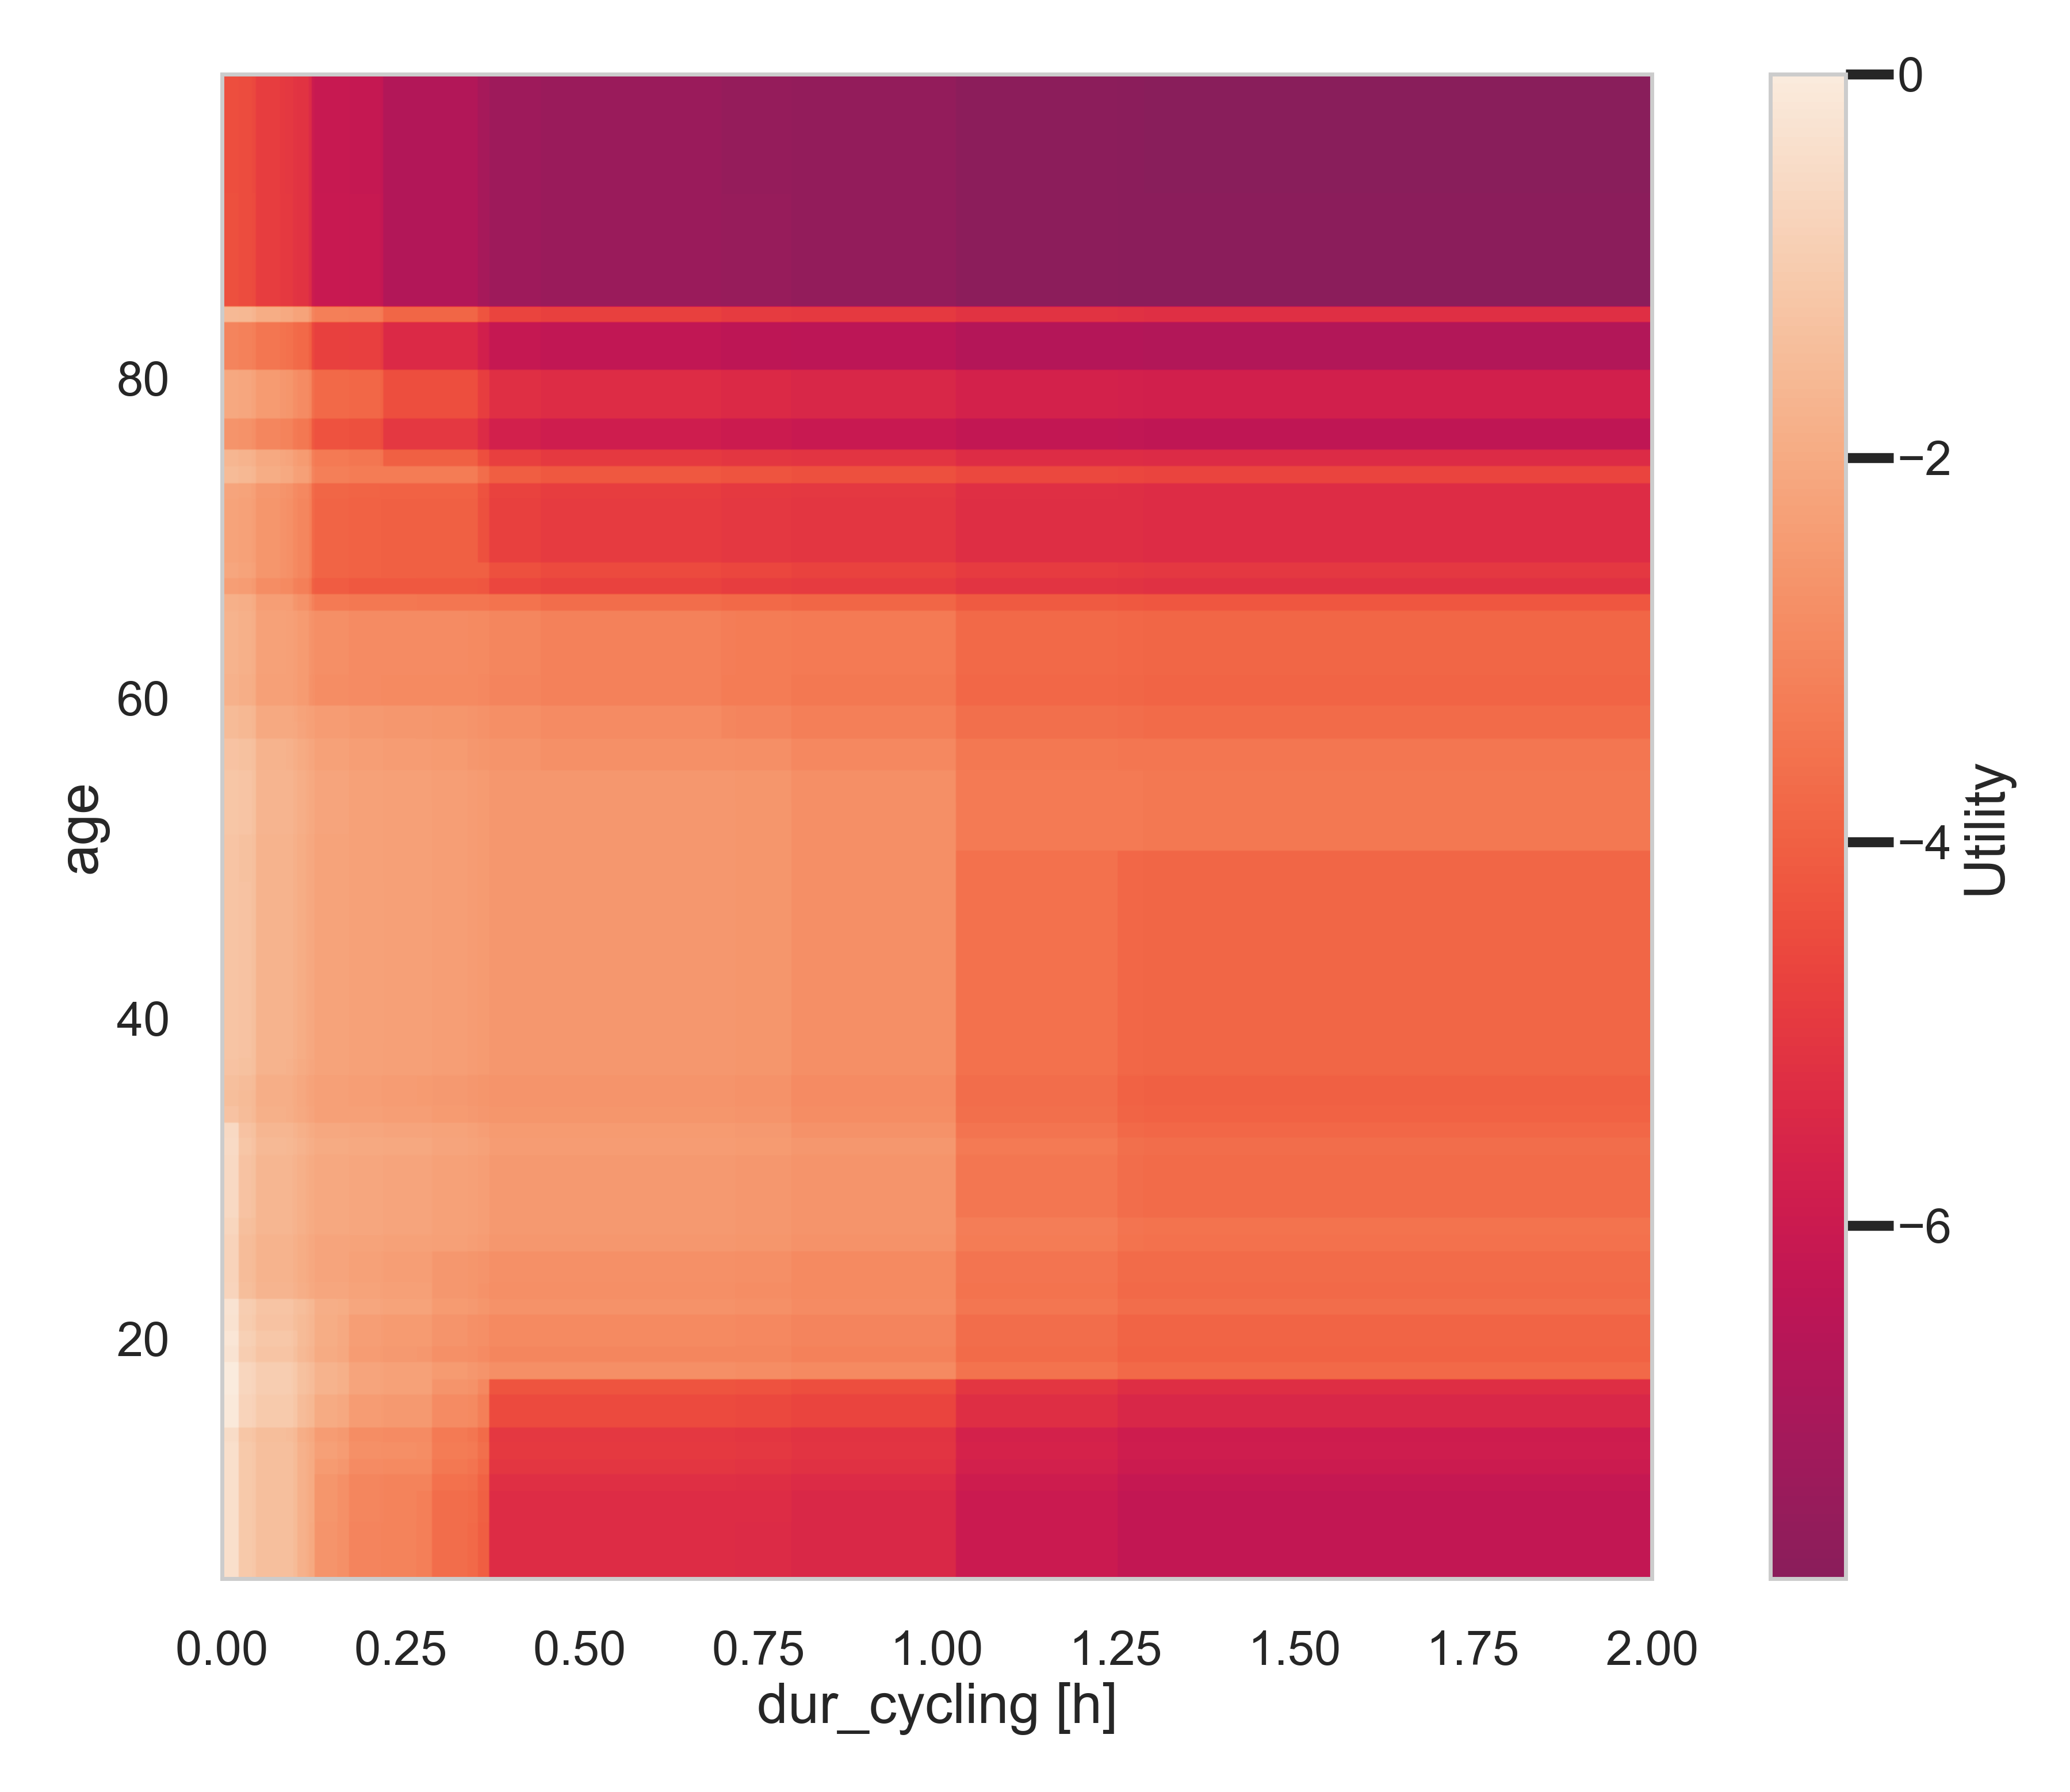

c:\Users\ucesnjs\OneDrive - University College London\Documents\PhD - UCL\rumboost\example\..\rumboost\utility_plotting.py:110: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(X, Y, contour_plot.T, levels=res, linewidths=0, cmap=customPalette, vmin=-12, vmax=0)


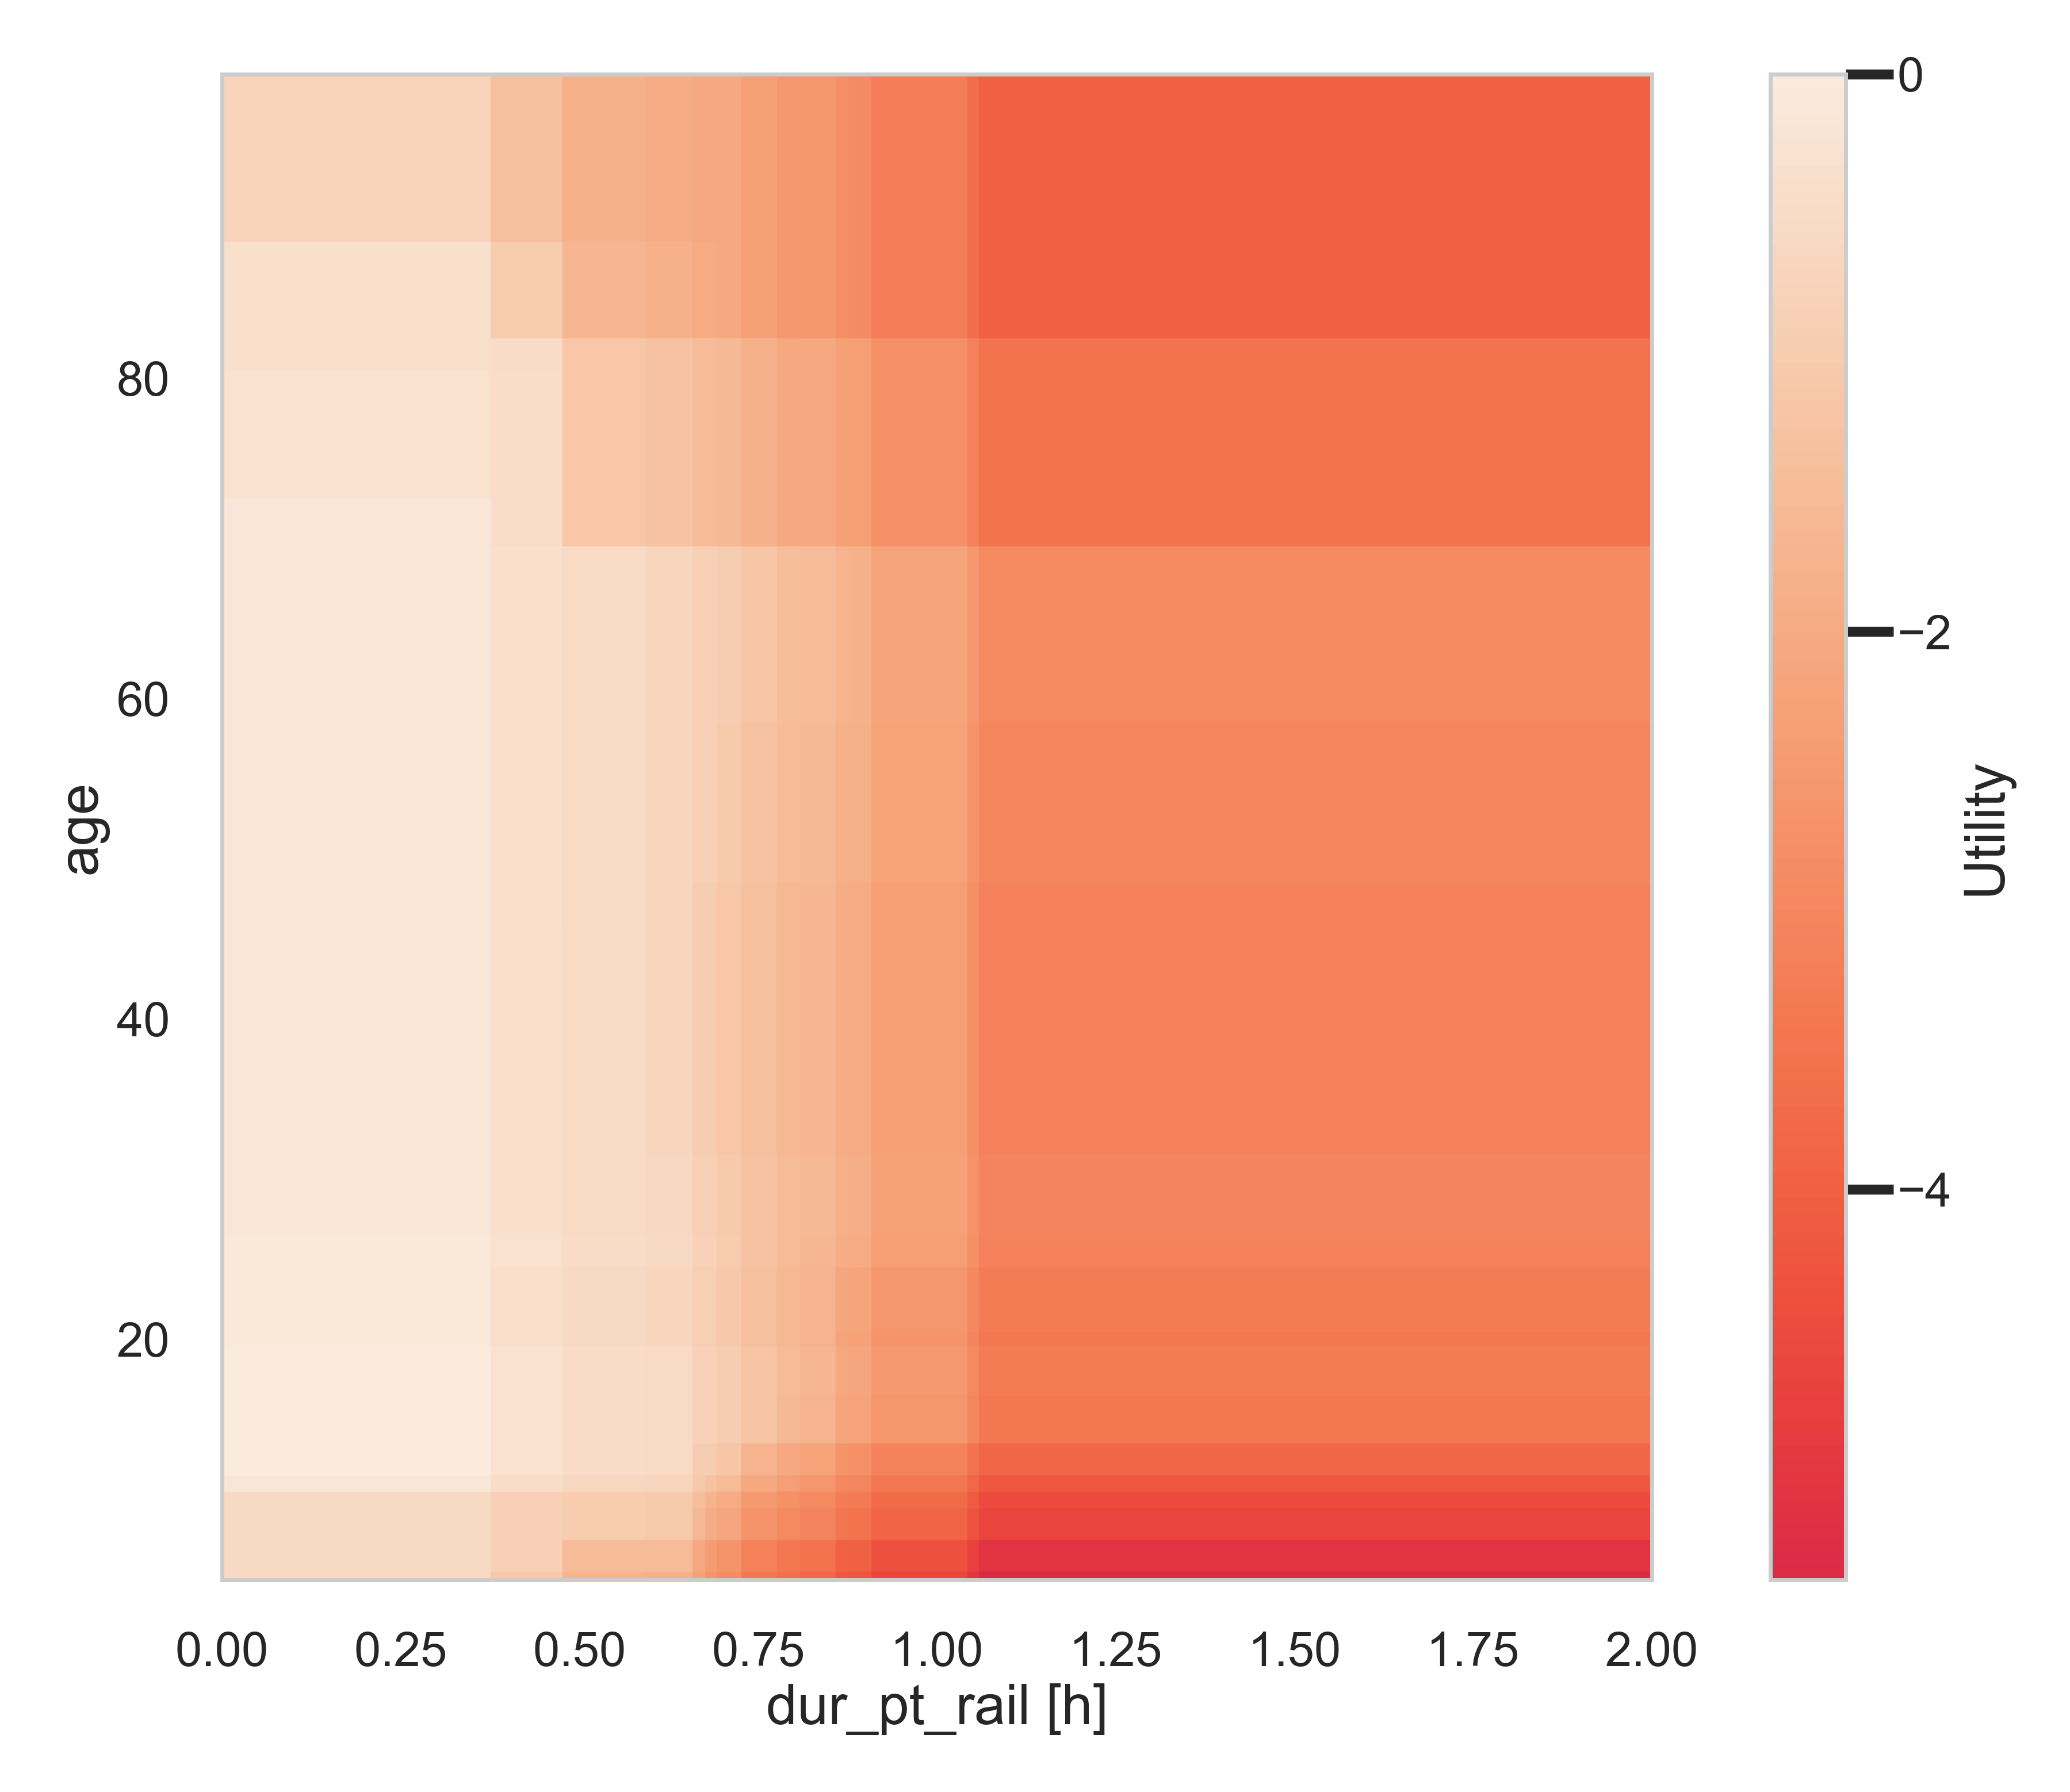

c:\Users\ucesnjs\OneDrive - University College London\Documents\PhD - UCL\rumboost\example\..\rumboost\utility_plotting.py:110: UserWarning: linewidths is ignored by contourf
  c_plot = axes.contourf(X, Y, contour_plot.T, levels=res, linewidths=0, cmap=customPalette, vmin=-12, vmax=0)


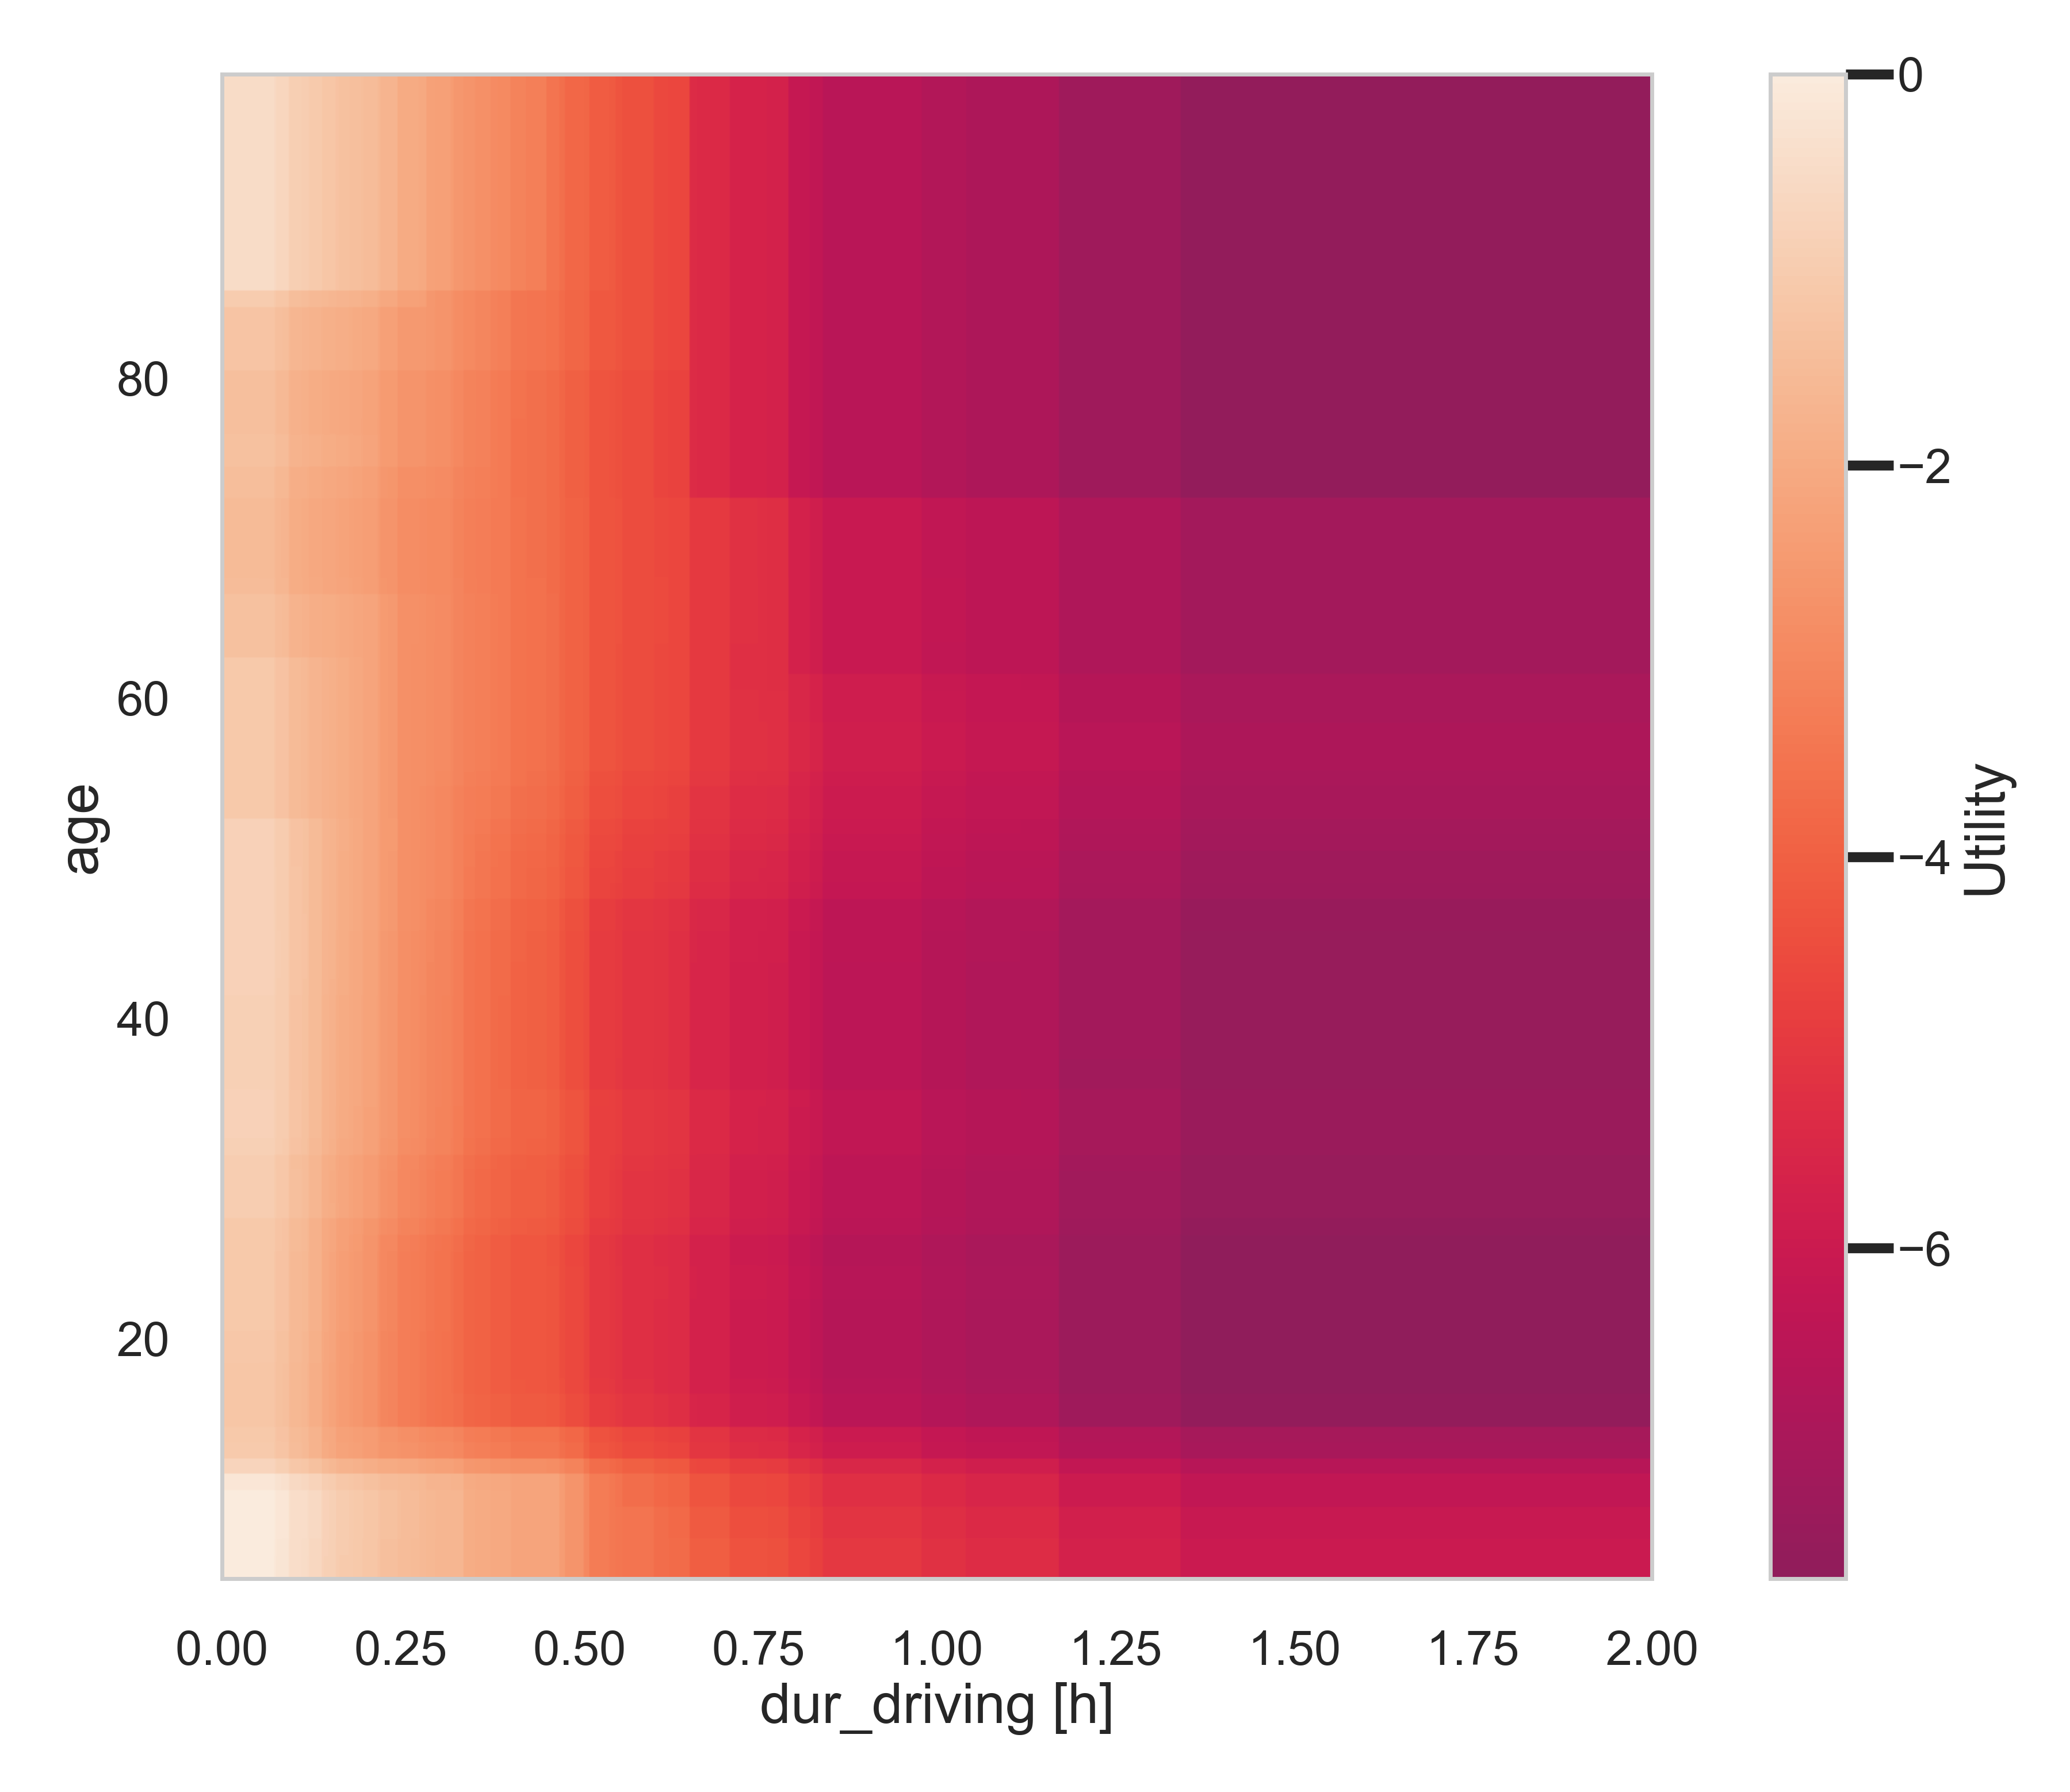

In [ ]:
utility_names={'0': 'Walking', '1': 'Cycling', '2':'PT', '3':'Driving'}

plot_2d(LPMCFI_model_fully_trained, 'dur_walking', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_cycling', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_pt_rail', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)
plot_2d(LPMCFI_model_fully_trained, 'dur_driving', 'age', 0, 2, LPMC_train['age'].min(), LPMC_train['age'].max(), num_points=1000, save_figure=False)

# References

Salvadé, N., & Hillel, T. (2024). Rumboost: Gradient Boosted Random Utility Models. *arXiv preprint [arXiv:2401.11954](https://arxiv.org/abs/2401.11954)*

Hillel, T., Elshafie, M.Z.E.B., Jin, Y., 2018. Recreating passenger mode choice-sets for transport simulation: A case study of London, UK. Proceedings of the Institution of Civil Engineers - Smart Infrastructure and Construction 171, 29–42. https://doi.org/10.1680/jsmic.17.00018